In [2]:
import sys
sys.path.append('../../')

In [31]:
#from SynRBL.SynChemImputer.functional_group_checker import FunctionalGroupChecker
from rdkit import Chem

class UnstableMol:
    @staticmethod
    def functional_group_check(smiles):
        if FunctionalGroupChecker.check_vicinal_diol(smiles):
            return 'vicinal_diol'
        elif FunctionalGroupChecker.check_enol(smiles):
            return 'enol'
        elif FunctionalGroupChecker.check_hemiacetal(smiles):
            return 'hemiacetal'
        elif FunctionalGroupChecker.check_carbonate(smiles):
            return 'carbonate'
        else:
            return None

    @staticmethod
    def fix(smiles):
        functional_group = UnstableMol.functional_group_check(smiles)
        print(functional_group)
        if functional_group == 'vicinal_diol':
            smiles = smiles.replace('OCO', 'C=O')
            return Chem.MolFromSmiles(smiles)
        elif functional_group == 'hemiacetal':
            smiles = smiles.replace('COCO', 'CO.C=O')
            return Chem.MolFromSmiles(smiles)
        elif functional_group == 'enol':
            smiles = smiles.replace('C=C(O)', 'CC=O')
            return Chem.MolFromSmiles(smiles)
        elif functional_group == 'carbonate':
            smiles = smiles.replace('COC(=O)O', 'CO.OC(=O)O').replace('OC(=O)OC', 'COC(=O)O.OC')
            return Chem.MolFromSmiles(smiles)
        else:
            return None


In [32]:
smi_diol = 'OCO'
smi_enol = 'C=C(O)'
smi_hemiacetal = 'COCO'
smi_carbonate = 'COC(=O)O'

In [38]:
from thermo.functional_groups import *
from rdkit import Chem

In [44]:
is_alcohol(Chem.MolFromSmiles('COCO')) 

True

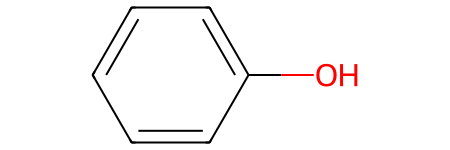

In [43]:
Chem.MolFromSmiles('C1=CC=CC=C1O')

vicinal_diol


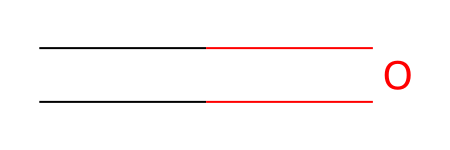

In [33]:
UnstableMol.fix(smi_diol)

enol


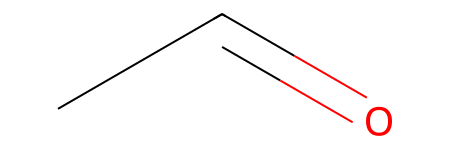

In [34]:
UnstableMol.fix(smi_enol)

carbonate


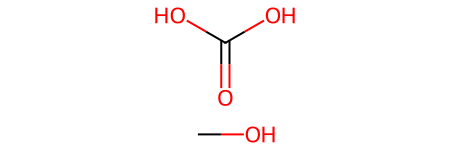

In [35]:
UnstableMol.fix(smi_carbonate)

In [30]:
from rdkit import Chem

class FunctionalGroupChecker:
    
    # 1. peroxid group
    @staticmethod
    def check_peroxide(smiles: str) -> bool:
        """
        Check for the presence of a peroxide substructure in a molecule.
        """
        peroxide_pattern = Chem.MolFromSmarts('OO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(peroxide_pattern) if mol and not FunctionalGroupChecker.check_peracid(smiles) else False

    @staticmethod
    def check_peracid(smiles: str) -> bool:
        """
        Check for the presence of a peracid substructure in a molecule.
        """
        peracid_pattern = Chem.MolFromSmarts('C(OO)=O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(peracid_pattern) if mol else False

    # 2. Alcohol group
    @staticmethod
    def check_alcohol(smiles: str) -> bool:
        """
        Check for the presence of an alcohol functional group in a molecule.
        """
        alcohol_pattern = Chem.MolFromSmarts('CO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(alcohol_pattern) if mol else False
    
    @staticmethod
    def check_enol(smiles: str) -> bool:
        """
        Check for the presence of an enol functional group in a molecule.
        """
        enol_pattern = Chem.MolFromSmarts('C=C(O)')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(enol_pattern) if mol else False

    @staticmethod
    def check_phenol(smiles: str) -> bool:
        """
        Check for the presence of a phenol functional group in a molecule.
        """
        phenol_pattern = Chem.MolFromSmarts('[c]O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(phenol_pattern) if mol else False

    @staticmethod
    def check_vicinal_diol(smiles: str) -> bool:
        """
        Check for the presence of a vicinal diol functional group in a molecule.
        """
        vicinal_diol_pattern = Chem.MolFromSmarts('OCO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(vicinal_diol_pattern) if mol and not FunctionalGroupChecker.check_hemiacetal(smiles)  and not FunctionalGroupChecker.check_carbonate(smiles) and not FunctionalGroupChecker.check_carboxylic_acid(smiles) and not FunctionalGroupChecker.check_ester(smiles) else False

    @staticmethod
    def check_gem_diol(smiles: str) -> bool:
        """
        Check for the presence of a gem diol functional group in a molecule.
        """
        gem_diol_pattern = Chem.MolFromSmarts('OCCO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(gem_diol_pattern) if mol else False

    @staticmethod
    def check_ether(smiles: str) -> bool:
        """
        Check for the presence of an ether functional group in a molecule.
        """
        ether_pattern = Chem.MolFromSmarts('COC')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(ether_pattern) if mol else False

    # 3. Carbonyl group
    @staticmethod
    def check_aldehyde(smiles: str) -> bool:
        """
        Check for the presence of an aldehyde functional group in a molecule.
        """
        aldehyde_pattern = Chem.MolFromSmarts('[CX3H1](=O)[#6]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(aldehyde_pattern) if mol else False

    @staticmethod
    def check_ketone(smiles: str) -> bool:
        """
        Check for the presence of a ketone functional group in a molecule.
        """
        ketone_pattern = Chem.MolFromSmarts('[#6][CX3](=O)[#6]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(ketone_pattern) if mol else False

    @staticmethod
    def check_acetal(smiles: str) -> bool:
        """
        Check for the presence of an acetal functional group in a molecule.
        """
        acetal_pattern = Chem.MolFromSmarts('[CX4][OX2][CX4]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(acetal_pattern) if mol else False

    @staticmethod
    def check_hemiacetal(smiles: str) -> bool:
        """
        Check for the presence of a hemiacetal functional group in a molecule.
        """
        hemiacetal_pattern = Chem.MolFromSmarts('COCO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(hemiacetal_pattern) if mol and not FunctionalGroupChecker.check_carbonate(smiles) and not FunctionalGroupChecker.check_carboxylic_acid(smiles) and not FunctionalGroupChecker.check_ester(smiles) else False

    # 4. Carboxylic group
    @staticmethod
    def check_carboxylic_acid(smiles: str) -> bool:
        """
        Check for the presence of a carboxylic acid functional group in a molecule.
        """
        carboxylic_acid_pattern = Chem.MolFromSmarts('C(=O)O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(carboxylic_acid_pattern) if mol else False

    @staticmethod
    def check_ester(smiles: str) -> bool:
        """
        Check for the presence of an ester functional group in a molecule.
        """
        ester_pattern = Chem.MolFromSmarts('C(=O)OC')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(ester_pattern) if mol and not FunctionalGroupChecker.check_carbonate(smiles) else False

    @staticmethod
    def check_amide(smiles: str) -> bool:
        """
        Check for the presence of an amide functional group in a molecule.
        """
        amide_pattern = Chem.MolFromSmarts('NC=O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(amide_pattern) if mol and not FunctionalGroupChecker.check_urea(smiles) else False
    
    @staticmethod
    def check_cyanide(smiles: str) -> bool:
        """
        Check for the presence of a cyanide functional group in a molecule.
        """
        cyanide_pattern = Chem.MolFromSmarts('[C-]#[N+]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(cyanide_pattern) if mol else False

    @staticmethod
    def check_urea(smiles: str) -> bool:
        """
        Check for the presence of a urea functional group in a molecule.
        """
        urea_pattern = Chem.MolFromSmarts('NC(=O)N')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(urea_pattern) if mol else False

    @staticmethod
    def check_carbonate(smiles: str) -> bool:
        """
        Check for the presence of a carbonate functional group in a molecule.
        """
        carbonate_pattern = Chem.MolFromSmarts('OC(=O)O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(carbonate_pattern) if mol else False

    # 5. Amine group
    @staticmethod
    def check_amine(smiles: str) -> bool:
        """
        Check for the presence of an amine functional group in a molecule.
        """
        amine_pattern = Chem.MolFromSmarts('CN')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(amine_pattern) if mol and not FunctionalGroupChecker.check_amide(smiles) else False
    
    @staticmethod
    def check_nitro(smiles: str) -> bool:
        """
        Check for the presence of a nitro functional group in a molecule.
        """
        nitro_pattern = Chem.MolFromSmarts('[N+](=O)[O-]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(nitro_pattern) if mol else False


In [45]:
Chem.MolToSmarts(Chem.MolFromSmiles('OC(=O)O'))

'[#8]-[#6](=[#8])-[#8]'

In [ ]:
def oxygen_group_check(smiles):
    alcohol_pattern = Chem.MolFromSmarts('CO')
    phenol_pattern = Chem.MolFromSmarts('[c]O')
    mol = Chem.MolFromSmiles(smiles)
    if mol.HasSubstructMatch(phenol_pattern):
        return 'phenol'
    elif mol.HasSubstructMatch(alcohol_pattern):
        enol_pattern = Chem.MolFromSmarts('C=C-O')
        diol_pattern = Chem.MolFromSmarts('OCO')
        amid_pattern = Chem.MolFromSmarts('NC=O')
        #acyl_pattern = [Chem.MolFromSmarts(f'C(=O){X}') for X in ['F','Cl','Br','I']]
        if mol.HasSubstructMatch(enol_pattern):
            return 'enol'
        elif mol.HasSubstructMatch(diol_pattern):
            ()
        elif mol.HasSubstructMatch(amid_pattern):
            return 'amide'
        else:
            return 'alcohol'
    else:
        return None
       

In [ ]:
def carboxylic_derivatives_check(smiles):
    mol = Chem.MolFromSmiles(smiles)
    ester_pattern = Chem.MolFromSmarts('C(=O)OC')
    acid_pattern = Chem.MolFromSmarts('C(=O)O')
    anhydride_pattern = Chem.MolFromSmarts('O=COC=O')
    if mol.HasSubstructMatch(ester_pattern):
        return 'ester'
    elif mol.HasSubstructMatch(anhydride_pattern):
        return 'anhydride'
    else:
        return 'acid'
    

In [ ]:
def COO_check(smiles):
    mol = Chem.MolFromSmiles(smiles)
    carbon_pattern = Chem.MolFromSmarts('C')
    oxygen_pattern = Chem.MolFromSmarts('O')
    if mol.HasSubstructMatch(carbon_pattern):
        return 'carbon'
    elif mol.HasSubstructMatch(oxygen_pattern):
        return 'oxygen'
    else:
        return None

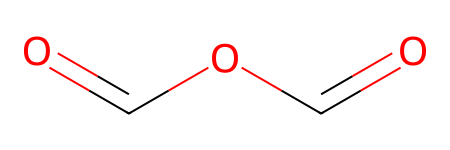

In [49]:
Chem.MolFromSmiles('C(=O)OC(=O)')

In [50]:
Chem.CanonSmiles('C(=O)OC(=O)')

'O=COC=O'